In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
X = pd.read_csv('../Data/CICIDS2017_combined.csv')

In [3]:
X.columns = X.columns.str.strip()

In [4]:
print(X.shape)
print(X.columns)
print(X['Label'].value_counts())

(2830743, 79)
Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
     

In [5]:
print(X.describe)

<bound method NDFrame.describe of          Destination Port  Flow Duration  Total Fwd Packets  \
0                   54865              3                  2   
1                   55054            109                  1   
2                   55055             52                  1   
3                   46236             34                  1   
4                   54863              3                  2   
...                   ...            ...                ...   
2830738                53          32215                  4   
2830739                53            324                  2   
2830740             58030             82                  2   
2830741                53        1048635                  6   
2830742                53          94939                  4   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             0                           12   
1                             1                            6   
2                

In [6]:
print(X.isnull().sum())
print("Infinite values:", np.isinf(X.select_dtypes(include=[np.number])).sum().sum())

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64
Infinite values: 4376


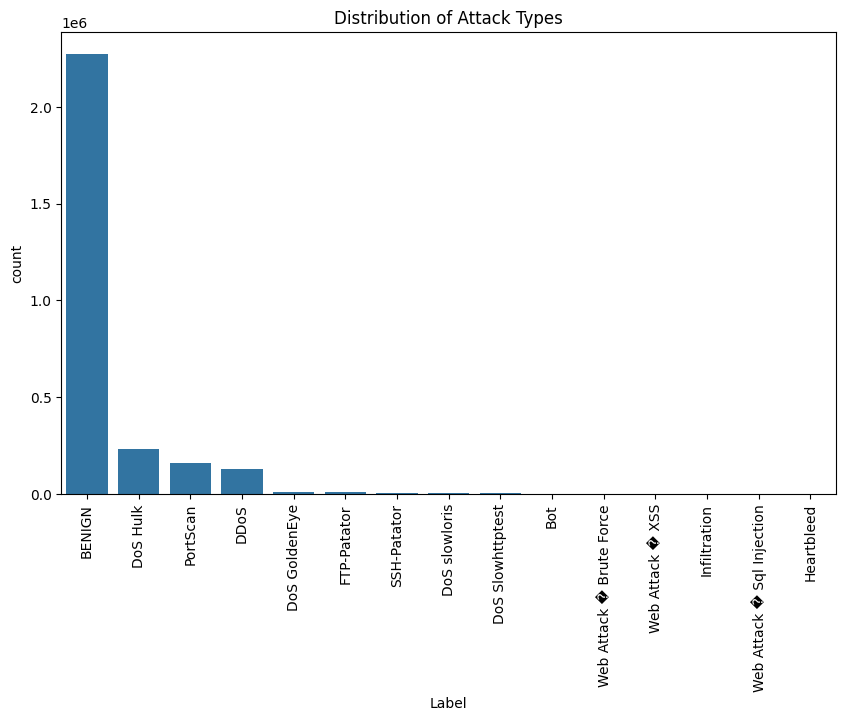

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='Label', order=X['Label'].value_counts().index, data=X)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types')
plt.show()

In [8]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)


In [9]:
label_counts = X['Label'].value_counts(normalize=True) * 100
print(label_counts)


Label
BENIGN                        80.318939
DoS Hulk                       8.137698
PortScan                       5.615663
DDoS                           4.527249
DoS GoldenEye                  0.363983
FTP-Patator                    0.280599
SSH-Patator                    0.208531
DoS slowloris                  0.204959
DoS Slowhttptest               0.194457
Bot                            0.069169
Web Attack � Brute Force       0.053291
Web Attack � XSS               0.023056
Infiltration                   0.001273
Web Attack � Sql Injection     0.000743
Heartbleed                     0.000389
Name: proportion, dtype: float64


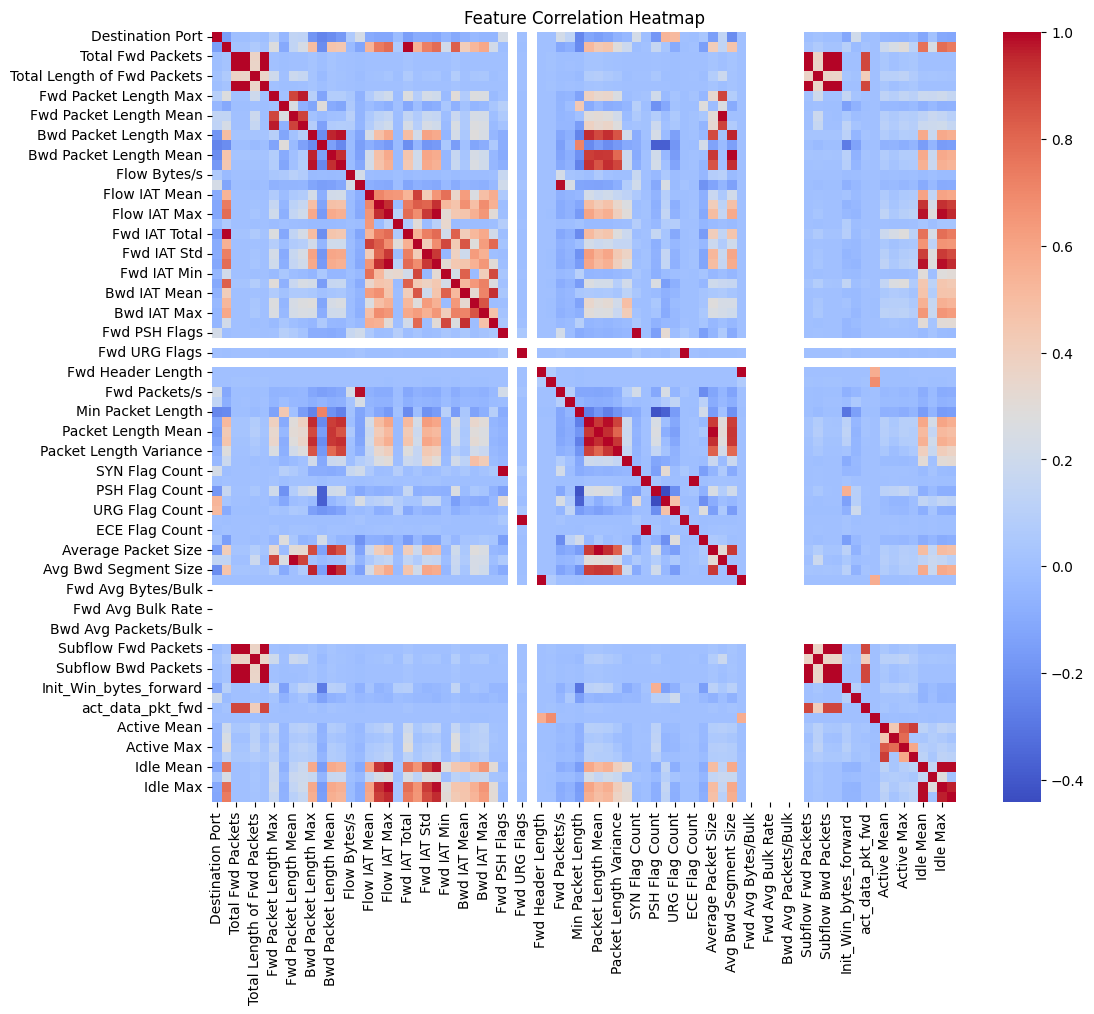

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(numeric_only=True), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
